# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.001
0.0
0.0
0.0
0.0
0.002
0.008
0.006
0.003
-0.001
-0.002
0.001
0.0
0.004
0.002
0.001
0.001
0.001
0.004
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
-0.001
0.0
0.0
-0.001
-0.001
0.0
0.002
0.003
0.003
0.002
0.002
0.002
0.002
0.004
0.004
0.0
0.0
0.0
0.0
0.004
0.0
-0.002
-0.003
0.995
0.995
0.995
0.993
1.991
1.989
1.991
1.99
2.98
2.98
2.98
2.979
3.972
3.972
3.971
3.97
4.961
4.96
4.96
5.951
5.95
5.949
5.951
5.951
6.763
6.758
6.76
7.571
7.573
7.572
7.572
7.573
8.569
8.569
8.568
8.571
9.568
9.568
9.566
9.568
10.559
10.557
10.556
10.556
11.557
11.557
11.557
12.553
12.552
12.553
12.553
13.551
13.552
13.549
13.554
14.274
14.274
14.273
14.271
15.009
15.008
15.007
15.007
16.005
16.005
16.004
16.003
16.005
17.001
17.001
17.001
16.997
17.993
17.993
17.993
17.991
17.991
18.985
18.984
18.984
18.984
19.977
19.978
19.979
19.978
19.977
20.976
20.972
20.972
20.973
21.965
21.964
21.964
21.965
21.965
22.957
22.956
22.956
23.944
23.944
23.943
23.943
24.95
24.949
24.946
24.946
25.931

57.573
57.572
57.572
57.571
57.571
57.569
57.572
57.572
57.57
57.57
57.57
57.57
57.57
57.57
57.569
57.569
57.569
57.568
57.568
57.568
57.566
57.566
57.566
57.565
57.565
57.565
57.566
57.565
57.565
57.566
57.567
57.567
57.567
57.567
57.564
57.564
57.564
57.564
57.564
57.595
57.627
57.661
57.661
57.661
57.66
57.66
57.661
57.658
57.658
57.672
57.672
57.671
57.671
57.672
57.672
57.671
57.67
57.67
57.674
57.672
57.672
57.67
57.667
57.669
57.669
57.667
57.668
57.667
57.667
57.666
57.667
57.663
57.663
57.665
57.665
57.663
57.664
57.665
57.663
57.662
57.662
57.663
57.664
57.664
57.664
57.665
57.665
57.663
57.661
57.661
57.659
57.661
57.661
57.724
57.799
57.835
57.86
57.86
57.857
57.858
57.859
57.858
57.858
57.859
57.859
57.857
57.857
57.857
57.857
57.855
57.855
57.855
57.856
57.856
57.856
57.858
57.858
57.856
57.856
57.858
57.853
57.857
57.857
57.856
57.853
57.856
57.855
57.85
57.851
57.851
57.851
57.851
57.851
57.85
57.852
57.852
57.851
57.851
57.851
57.851
57.852
57.851
57.851
57.851
57.85
5

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1637,3274,59.493
1638,3276,59.497
1639,3278,59.497
1640,3280,59.499


<IPython.core.display.Javascript object>


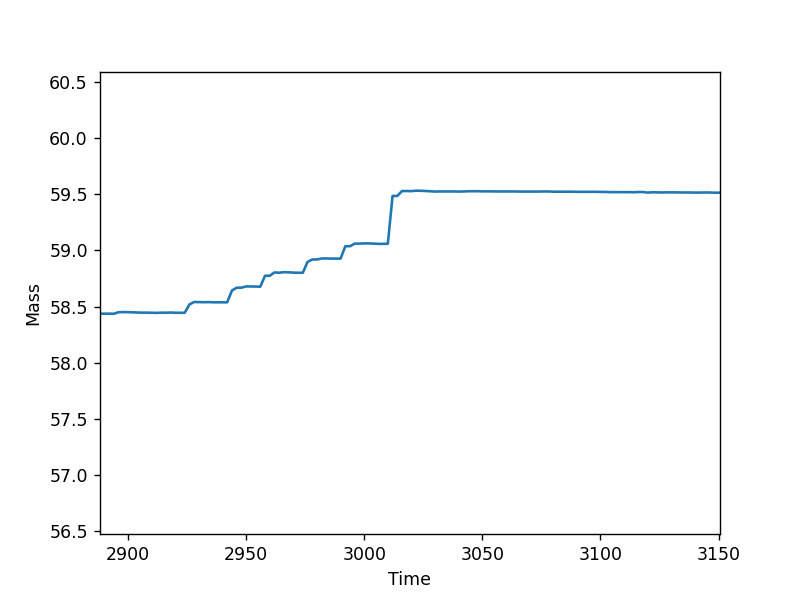

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_270223_S109-114.csv')